In [28]:
##Important required Packages

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [41]:
##reading the data from dataset

In [42]:
data=pd.read_csv("Transformed Data Set - Sheet1.csv")

In [89]:
data.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [15]:
##print the data

In [90]:
print(data)

   Favorite Color Favorite Music Genre Favorite Beverage Favorite Soft Drink  \
0            Cool                 Rock             Vodka          7UP/Sprite   
1         Neutral              Hip hop             Vodka     Coca Cola/Pepsi   
2            Warm                 Rock              Wine     Coca Cola/Pepsi   
3            Warm     Folk/Traditional           Whiskey               Fanta   
4            Cool                 Rock             Vodka     Coca Cola/Pepsi   
..            ...                  ...               ...                 ...   
61           Cool                 Rock             Vodka     Coca Cola/Pepsi   
62           Cool              Hip hop              Beer     Coca Cola/Pepsi   
63        Neutral              Hip hop     Doesn't drink               Fanta   
64           Cool                 Rock              Wine     Coca Cola/Pepsi   
65           Cool           Electronic              Beer     Coca Cola/Pepsi   

   Gender  
0       F  
1       F  
2  

In [91]:
#head to print five rows of datasets

In [92]:
data.head()

Favorite Color Favorite Music Genre Favorite Beverage Favorite Soft Drink  \
0           Cool                 Rock             Vodka          7UP/Sprite   
1        Neutral              Hip hop             Vodka     Coca Cola/Pepsi   
2           Warm                 Rock              Wine     Coca Cola/Pepsi   
3           Warm     Folk/Traditional           Whiskey               Fanta   
4           Cool                 Rock             Vodka     Coca Cola/Pepsi   

  Gender  
0      F  
1      F  
2      F  
3      F  
4      F

In [45]:
##Generating random classification classes

In [46]:
features, target=make_classification(n_samples=200,n_features=4,n_classes=3,n_clusters_per_class=1,random_state=38)

In [47]:
##shape attribute to check how large the resulting dataframe "Features" and also gives dimensions with reshape the data and stire in numpy array

In [48]:
features.shape

(200, 4)

In [49]:
##target is for checking how large the resulting datafranme "target"

In [50]:
target.shape

(200,)

In [51]:
##Feature selection with python list and printing that selected data.

In [52]:
feature_names = ['feature_0', 'feature_1', 'feature_2', 'feature_3']

In [53]:
##creating a feature matrix dataFrame with only one column named features_names

In [54]:
features_df = pd.DataFrame(features, columns=feature_names)

In [55]:
##head command which gives five rows of dataframe anf printing it

In [56]:
features_df.head()

feature_0  feature_1  feature_2  feature_3
0   1.446359   0.819678  -1.431107  -0.555782
1  -1.700430  -2.176358   2.847455   0.065193
2  -3.502424   3.852412  -2.142033   4.177241
3   0.882475  -0.738106   0.316311  -0.939703
4  -0.632274  -0.238474   0.510477   0.301091

In [57]:
##Creating a target matrix dataframe with only one column named target

In [58]:
target_df = pd.DataFrame(target, columns=['target'])

In [59]:
##Using the head() command, which grabs the first five rows of DataFrame target_df

In [64]:
target_df.head()

target
0       2
1       0
2       1
3       2
4       1

In [65]:
##concat() for combining DataFrames across rows or columns. Here features_df and target_df both dataframe are combine in one dataFrame across columns because its has axis=1.

In [66]:
dataset = pd.concat([features_df, target_df], axis=1)

In [67]:
##dataset.head() will print out the first five rows

In [68]:
dataset.head()

feature_0  feature_1  feature_2  feature_3  target
0   1.446359   0.819678  -1.431107  -0.555782       2
1  -1.700430  -2.176358   2.847455   0.065193       0
2  -3.502424   3.852412  -2.142033   4.177241       1
3   0.882475  -0.738106   0.316311  -0.939703       2
4  -0.632274  -0.238474   0.510477   0.301091       1

In [69]:
##It will plot the data into a graph with the x-axis feature_0, y-axis feature_1 and indicating

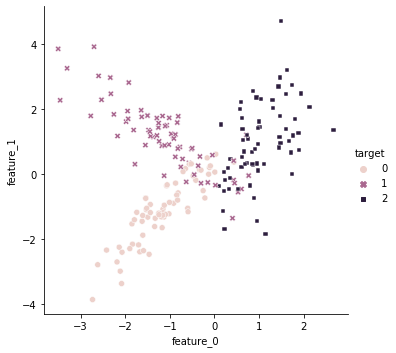

In [70]:
sns.relplot(
    x='feature_0', y='feature_1', hue='target', style='target', data=dataset)
plt.show()

In [36]:
##It is reploting the graph with x-axis features_0 ,y-axis features_3

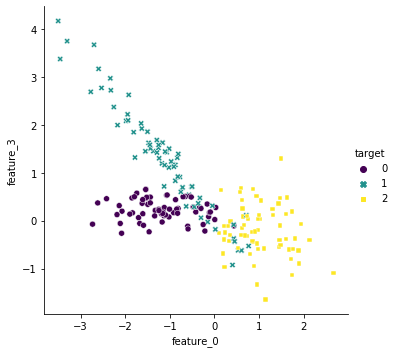

In [37]:
sns.relplot(
    x='feature_0', y='feature_3', hue='target', style='target', palette='viridis', data=dataset)
plt.show()

In [38]:
##It is reploting the graph with x-axis features_1 ,y-axis features_2

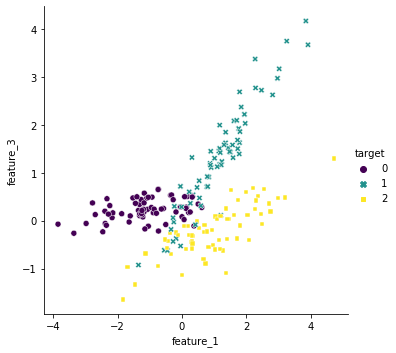

In [71]:
sns.relplot(
    x='feature_1', y='feature_3', hue='target', style='target', palette='viridis', data=dataset)
plt.show()

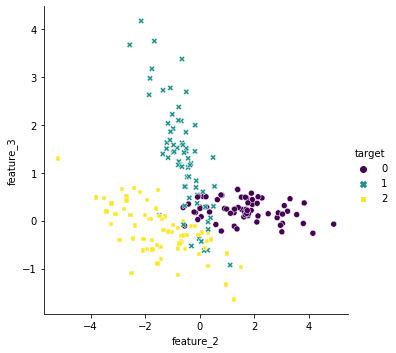

In [72]:
sns.relplot(
    x='feature_2', y='feature_3', hue='target', style='target', palette='viridis', data=dataset)
plt.show()

In [73]:
#Splitting the datasets into training and test data

In [74]:
training_features, test_features, training_target, test_target = train_test_split(
    features, target, random_state=0)

In [75]:
#printing the training data and test data with their dimensions.

In [76]:
print(training_features.shape, test_features.shape)

(150, 4) (50, 4)


In [77]:
#Creating a model baed on  DecisionTreeClassifier with the criterion of entropy

In [78]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc

DecisionTreeClassifier(criterion='entropy')

In [79]:
#Fitting the datasets into the algorithims

In [80]:
model = dtc.fit(training_features, training_target)

In [81]:
#predicting the result as according to the test_features

In [82]:
predictions = model.predict(test_features)

In [83]:
#Created Confusion Matrix which gives the performce of algorithm

In [84]:
matrix = confusion_matrix(test_target, predictions)

In [85]:
#printing the matrix with the outcome of the confusion matrix

In [86]:
print(matrix)

[[15  3  0]
 [ 3 10  1]
 [ 0  1 17]]


In [87]:
#printing the result as according to test_target and predictions which generate the reports 

In [88]:
print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.71      0.71      0.71        14
           2       0.94      0.94      0.94        18

    accuracy                           0.84        50
   macro avg       0.83      0.83      0.83        50
weighted avg       0.84      0.84      0.84        50



In [93]:
## Another classification algorithm and importing that

In [98]:
from sklearn.linear_model import LogisticRegression

In [112]:
dtc1 = LogisticRegression()
dtc1

LogisticRegression()

In [ ]:
#Fitting the datasets into the algorithims

In [111]:
model1 = dtc1.fit(training_features, training_target)

In [ ]:
#predicting the result as according to the test_features

In [109]:
predictions = model1.predict(test_features)

In [ ]:
#Created Confusion Matrix which gives the performce of algorithm

In [107]:
matrix = confusion_matrix(test_target, predictions)

In [ ]:
#printing the matrix with the outcome of the confusion matrix

In [108]:
print(matrix)

[[15  3  0]
 [ 2  9  3]
 [ 0  0 18]]


In [ ]:
#printing the result as according to test_target and predictions which generate the reports 

In [113]:
print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.75      0.64      0.69        14
           2       0.86      1.00      0.92        18

    accuracy                           0.84        50
   macro avg       0.83      0.83      0.82        50
weighted avg       0.84      0.84      0.83        50



In [ ]:
# The accuracy from dicision tree and logistic Regression